In [ ]:
%pip install networkx matplotlib
%pip install pydot
%pip install networkx matplotlib

import os
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx
import re
import hashlib


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\henry\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\henry\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\henry\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



📂 Duplicate folders (top-level only):

- Biotech YES
   C:\Users\henry\Documents\iCloudDrive\.Trash\Biotech YES
   C:\Users\henry\Documents\iCloudDrive\_Google drive migration\Algenuity iMac\shuttle\Personal files\UCL data\Tidyup\Dropbox 23.1.13 backup\Non-work\Biotech YES
   C:\Users\henry\Documents\iCloudDrive\_Google drive migration\Dropbox migration\New Structure\Non-work\Biotech YES
   C:\Users\henry\Documents\iCloudDrive\_Google drive migration\Macbook\Documents\MBP documents\Personal files\Random\Biotech YES

- DCIM
   C:\Users\henry\Documents\iCloudDrive\.Trash\DCIM
   C:\Users\henry\Documents\iCloudDrive\_Google drive migration\Desktop tidyup 27.1.21\DCIM
   C:\Users\henry\Documents\iCloudDrive\_Google drive migration\Macbook\Desktop\Desktop tidy 19.9.18\Desktop tidyup\Desktop Tidyup Sept '14\Desktop tidy 15.3.14\Old M2 card\DCIM

- evie
   C:\Users\henry\Documents\iCloudDrive\Desktop\evie
   C:\Users\henry\Documents\iCloudDrive\Desktop\Desktop tidy 10.03.25\evie

- Desktop
 

C:\Users\henry\AppData\Local\Temp\ipykernel_18228\1791048364.py:159: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\henry\AppData\Local\Temp\ipykernel_18228\1791048364.py:159: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\henry\AppData\Local\Temp\ipykernel_18228\1791048364.py:159: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\henry\AppData\Local\Temp\ipykernel_18228\1791048364.py:160: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, dpi=300, bbox_inches="tight")
C:\Users\henry\AppData\Local\Temp\ipykernel_18228\1791048364.py:160: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, dpi=300, bbox_inches="tight")
C:\Users\henry\AppData\Loca


✅ Folder tree saved to: folder_tree.png


C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


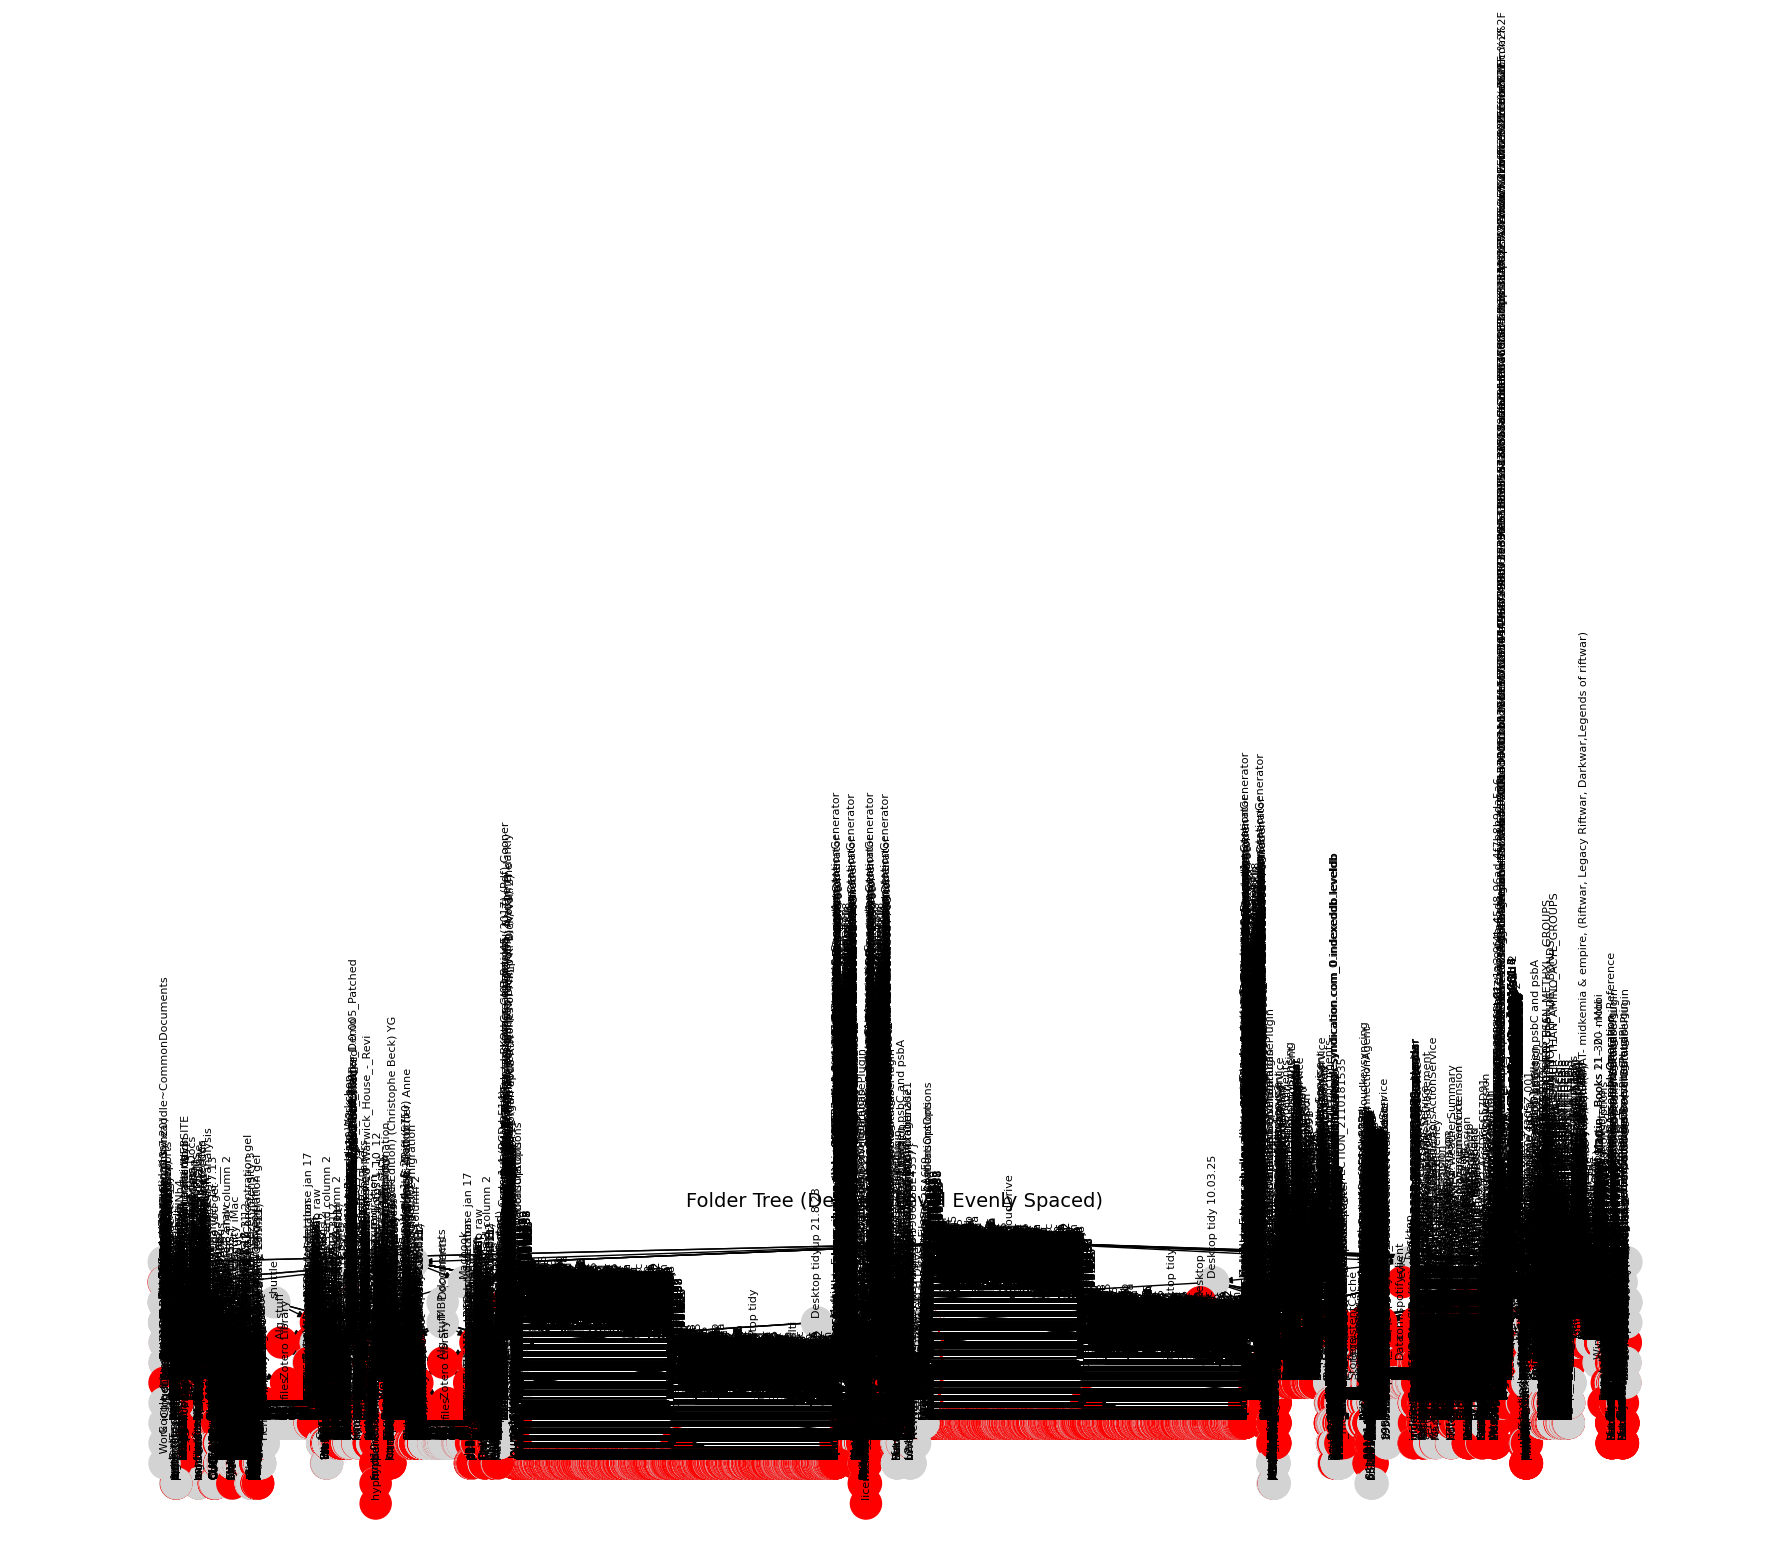

In [3]:


# -------------------------
# STEP 1: Folder comparison
# -------------------------

def sanitize_label(label):
    return re.sub(r'[（）：]', lambda m: {'（': '(', '）': ')', '：': ':'}[m.group()], label)


def get_folder_signature(path, deep_compare=False):
    """
    Return a tuple signature of a folder's top-level files.
    - If deep_compare: include file sizes
    """
    signature = []
    try:
        for root, dirs, files in os.walk(path):
            if root != path:
                continue  # only top-level
            for f in sorted(files):
                full_path = os.path.join(root, f)
                if os.path.isfile(full_path):
                    if deep_compare:
                        size = os.path.getsize(full_path)
                        signature.append((f, size))
                    else:
                        signature.append(f)
    except Exception as e:
        print(f"Warning: skipping {path} due to error: {e}")
    return tuple(signature)


def find_duplicate_folders(parent_dir, deep_compare=False):
    """
    Traverse directory tree and find folders with identical names and contents.
    """
    folder_map = defaultdict(list)

    for root, dirs, files in os.walk(parent_dir):
        for d in dirs:
            folder_path = os.path.join(root, d)
            sig = get_folder_signature(folder_path, deep_compare)
            key = (d, sig)
            folder_map[key].append(folder_path)

    # Keep only folders with duplicates
    duplicates = {k: v for k, v in folder_map.items() if len(v) > 1}
    return duplicates


# -------------------------
# STEP 2: Deduplication logic
# -------------------------

def flatten_duplicate_paths(duplicates):
    """
    For each duplicate group, return only the top-most folders,
    excluding any that are nested inside another duplicate.
    """
    all_paths = set()
    for dup_list in duplicates.values():
        sorted_dups = sorted(dup_list, key=lambda p: p.count(os.sep))  # shallowest first
        top_level = []
        for path in sorted_dups:
            if not any(os.path.commonpath([path, top]) == top for top in top_level):
                top_level.append(path)
        all_paths.update(top_level)
    return all_paths


# --------------------------
# STEP 3: Build folder graph
# --------------------------

def build_tree_graph(parent_dir, duplicates_set):
    """
    Build a tree from the full folder structure.
    Ensures parent_dir is explicitly added as root node.
    """
    G = nx.DiGraph()
    labels = {}
    red_nodes = set()

    for root, dirs, files in os.walk(parent_dir):
        # Ensure root is added to graph
        if root not in G:
            G.add_node(root)
            labels[root] = os.path.basename(root) or root

        for d in dirs:
            child = os.path.join(root, d)
            G.add_edge(root, child)
            labels[child] = os.path.basename(child)
            if child in duplicates_set:
                red_nodes.add(child)

    if parent_dir in duplicates_set:
        red_nodes.add(parent_dir)

    return G, labels, red_nodes


# --------------------------
# STEP 4: Draw and save tree
# --------------------------


def draw_tree(G, labels, red_nodes, parent_dir, output_path="folder_tree.png", leaf_spacing=1.5):
    import matplotlib.pyplot as plt
    from collections import defaultdict

    def get_leaf_nodes(G):
        return [n for n in G.nodes() if G.out_degree(n) == 0]

    def get_depths(G, root):
        depths = {}
        def dfs(node, depth):
            depths[node] = depth
            for child in G.successors(node):
                dfs(child, depth + 1)
        dfs(root, 0)
        return depths

    def layout_with_leaf_spacing(G, root, leaf_spacing=1.0, vert_gap=80.0):
        depths = get_depths(G, root)
        leaves = sorted(get_leaf_nodes(G), key=lambda x: x.lower())
        x_positions = {leaf: i * leaf_spacing for i, leaf in enumerate(leaves)}
        pos = {}

        def assign_positions(node):
            children = list(G.successors(node))
            if not children:
                pos[node] = (x_positions[node], -depths[node] * vert_gap)
            else:
                for child in children:
                    assign_positions(child)
                child_xs = [pos[child][0] for child in children]
                centroid = sum(child_xs) / len(child_xs)
                pos[node] = (centroid, -depths[node] * vert_gap)

        assign_positions(root)
        return pos

    print("🧩 Using hierarchy layout with evenly spaced leaf nodes...")

    # Ensure root is passed explicitly
    pos = layout_with_leaf_spacing(G, root=parent_dir, leaf_spacing=leaf_spacing, vert_gap=80.0)

    plt.figure(figsize=(18, 12))
    node_colors = ['red' if node in red_nodes else 'lightgray' for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)
    nx.draw_networkx_edges(G, pos)

    for node, (x, y) in pos.items():
        label = labels.get(node, os.path.basename(node))
        plt.text(x, y + 20, label, fontsize=8, rotation=90, va='bottom', ha='center')

    plt.title("Folder Tree (Deepest Level Evenly Spaced)", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(output_path, dpi=300, bbox_inches="tight")
    print(f"\n✅ Folder tree saved to: {output_path}")
    plt.show()



# --------------------------
# STEP 5: Main execution
# --------------------------

if __name__ == "__main__":
    # CHANGE THIS to the folder you want to scan
    parent_folder = r"C:\Users\henry\Documents\iCloudDrive"  # <<-- CHANGE THIS

    deep_compare = False  # Set to True to include file sizes in duplicate check

    # Step 1: Scan and group duplicate folders
    duplicates = find_duplicate_folders(parent_folder, deep_compare=deep_compare)

    # Step 2: Print out the duplicate groups
    print("\n📂 Duplicate folders (top-level only):")
    for (name, sig), paths in duplicates.items():
        print(f"\n- {name}")
        for p in paths:
            print(f"   {p}")

    # Step 3: Get only top-level duplicate folders
    duplicates_set = flatten_duplicate_paths(duplicates)

    # Step 4: Build graph of full tree (not just duplicates)
    G, labels, _ = build_tree_graph(parent_folder, set())

    # Step 5: Highlight only the top-level duplicates
    red_nodes = duplicates_set

    # Step 6: Draw and save to PNG
    draw_tree(G, labels, red_nodes, parent_folder, output_path="folder_tree.png", leaf_spacing=2.0)

